# About This Project

The [Iris flower dataset or Fisher's Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus". The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

<img src="../images/iris.jpg" />

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn.externals 
import joblib

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load The Data
I am going to use Iris flowers dataset. The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

<img src="../images/irisdataset.png" />

In [7]:
# Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [39]:
df.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Preprocessing 

In [12]:
df.shape

(150, 5)

In [13]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [15]:
df.isnull().sum() 

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [16]:
#df.dropna() #NaN
#df.fillna()

## Exploratory Data Analysis(EDA)

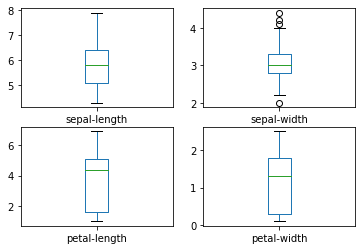

In [17]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

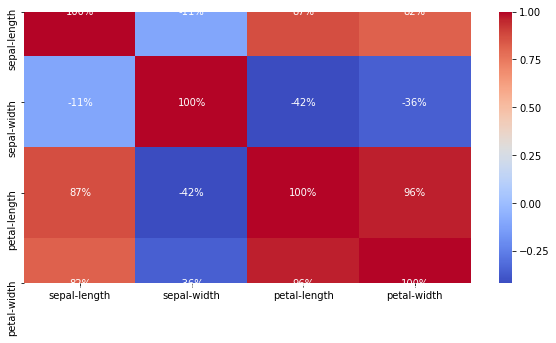

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.0%')

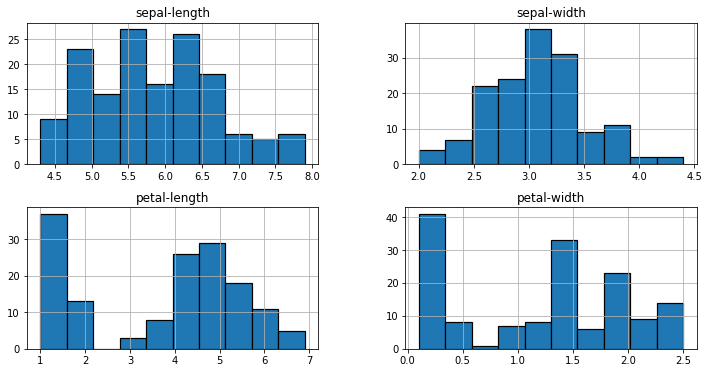

In [20]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Splitting The Data into Training And Testing Dataset

In [23]:
array = df.values
#print(array)
X = array[:,0:4]    #1st 4 cols are training attributes
Y = array[:,4]      #5th col is the class (species name in our case)

In [24]:
test_size = 0.20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size)

## Build Machine Learning Models

### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [31]:
# we train the algorithm with training data and training output
logit.fit(X_train,Y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [32]:
# we pass the testing data to the stored algorithm to predict the outcome
prediction = logit.predict(X_test)

In [33]:
print(prediction)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa']


In [34]:
# we check the accuracy of the algorithm
print('The accuracy of the Logistic Regression is: ', accuracy_score(prediction, Y_test))

The accuracy of the Logistic Regression is:  0.9


### Save model

In [35]:
joblib.dump(logit, '../model/log_reg_model_iris.pkl')

['../model/log_reg_model_iris.pkl']

### Testing

In [40]:
model = joblib.load(open('../model/log_reg_model_iris.pkl','rb'))
inputs = np.array([4.9,3.1,1.5,0.1]).reshape(1,4)
output = model.predict(inputs)
print(output)

['Iris-setosa']


### 2. K-Nearest Neighbors (KNN)

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

In [43]:
print('The accuracy of the K-Nearest Neighbors is: ', accuracy_score(prediction, Y_test))

The accuracy of the K-Nearest Neighbors is:  0.9333333333333333


In [44]:
joblib.dump(knn, '../model/knn_model_iris.pkl')

['../model/knn_model_iris.pkl']

### Testing

In [45]:
model = joblib.load(open('../model/knn_model_iris.pkl','rb'))
inputs = np.array([6.5,3.2,5.1,2]).reshape(1,4)
output = model.predict(inputs)
print(output)

['Iris-virginica']


### 3. Decision Trees

In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
prediction = dtree.predict(X_test)

In [47]:
print('The accuracy of the Decision Trees is: ', accuracy_score(prediction, Y_test))

The accuracy of the Decision Trees is:  0.9


In [48]:
joblib.dump(dtree, '../model/decision_tree_model_iris.pkl')

['../model/decision_tree_model_iris.pkl']

### Testing

In [61]:
model = joblib.load(open('../model/decision_tree_model_iris.pkl','rb'))
inputs = np.array([6.5,3.2,5.1,2]).reshape(1,4)
output = model.predict(inputs)
print(output)

['Iris-virginica']
